In [139]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import itertools

import matplotlib.pyplot as plt

%matplotlib inline

In [140]:
df = pd.read_csv(r"C:\Users\vmakh\OneDrive\Desktop\Python-20220419T075236Z-001\Python\Data science for business\Lec 7\crx.data")
df.head(5)

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [141]:
df.isnull().sum()

b        0
30.83    0
0        0
u        0
g        0
w        0
v        0
1.25     0
t        0
t.1      0
01       0
f        0
g.1      0
00202    0
0.1      0
+        0
dtype: int64

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   b       689 non-null    object 
 1   30.83   689 non-null    object 
 2   0       689 non-null    float64
 3   u       689 non-null    object 
 4   g       689 non-null    object 
 5   w       689 non-null    object 
 6   v       689 non-null    object 
 7   1.25    689 non-null    float64
 8   t       689 non-null    object 
 9   t.1     689 non-null    object 
 10  01      689 non-null    int64  
 11  f       689 non-null    object 
 12  g.1     689 non-null    object 
 13  00202   689 non-null    object 
 14  0.1     689 non-null    int64  
 15  +       689 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.2+ KB


In [143]:
#indexq= df[ (df['b'] == '?') | (df['30.83'] == '?') ].index
df=df.replace({'?':np.nan}).dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 652 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   b       652 non-null    object 
 1   30.83   652 non-null    object 
 2   0       652 non-null    float64
 3   u       652 non-null    object 
 4   g       652 non-null    object 
 5   w       652 non-null    object 
 6   v       652 non-null    object 
 7   1.25    652 non-null    float64
 8   t       652 non-null    object 
 9   t.1     652 non-null    object 
 10  01      652 non-null    int64  
 11  f       652 non-null    object 
 12  g.1     652 non-null    object 
 13  00202   652 non-null    object 
 14  0.1     652 non-null    int64  
 15  +       652 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.6+ KB


In [144]:
df.index = range(652)

In [145]:
df.iloc[:,-1]= df.iloc[:,-1].apply(lambda x: 1 if x=='+' else 0, 1)
y=df.iloc[:,-1]
y.value_counts()

0    357
1    295
Name: +, dtype: int64

In [146]:
X = df.iloc[: , :-1]
X.head(3)

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1
0,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,00043,560
1,a,24.50,0.50,u,g,q,h,1.50,t,f,0,f,g,00280,824
2,b,27.83,1.54,u,g,w,v,3.75,t,t,5,t,g,00100,3


In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [148]:
num_cols=[col for col in df.iloc[: , :-1].columns if df[col].dtype!='O']
num_cols

['0', '1.25', '01', '0.1']

In [149]:
df['00202'].head()

0    00043
1    00280
2    00100
3    00120
4    00360
Name: 00202, dtype: object

In [150]:
df[['30.83', '00202']] = df[['30.83', '00202']].apply(pd.to_numeric)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   b       652 non-null    object 
 1   30.83   652 non-null    float64
 2   0       652 non-null    float64
 3   u       652 non-null    object 
 4   g       652 non-null    object 
 5   w       652 non-null    object 
 6   v       652 non-null    object 
 7   1.25    652 non-null    float64
 8   t       652 non-null    object 
 9   t.1     652 non-null    object 
 10  01      652 non-null    int64  
 11  f       652 non-null    object 
 12  g.1     652 non-null    object 
 13  00202   652 non-null    int64  
 14  0.1     652 non-null    int64  
 15  +       652 non-null    int64  
dtypes: float64(3), int64(4), object(9)
memory usage: 81.6+ KB


In [256]:
num_cols=[col for col in df.iloc[: , :-1].columns if df[col].dtype!='O']
num_cols

['30.83', '0', '1.25', '01', '00202', '0.1']

In [257]:
cat_cols=[col for col in df.columns if df[col].dtype=='O']
cat_cols

['b', 'u', 'g', 'w', 'v', 't', 't.1', 'f', 'g.1']

In [182]:
#соберем наш простой pipeline, но нам понадобится написать класс для выбора нужного поля
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]
    
final_transformers = list()
    
for cat_col in cat_cols:
    cat_transformer = Pipeline([
                ('selector', FeatureSelector(column=cat_col)),
                #('vectorizer', TfidfVectorizer())
                ('ohe', OHEEncoder('cat_cal'))
            ])
    final_transformers.append((cat_col, cat_transformer))
    
for cont_col in num_cols:
    cont_transformer = Pipeline([
                ('selector', NumberSelector(key=cont_col)),
                ('scaler', StandardScaler())
            ])
    final_transformers.append((cont_col, cont_transformer))

In [189]:
feats = FeatureUnion(final_transformers)

feature_processing = Pipeline([('feats', feats)])

type(feature_processing)

sklearn.pipeline.Pipeline

In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

In [185]:
pipeline_1 = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
])

pipeline_2 = Pipeline([
    ('features',feats),
    ('classifier', GradientBoostingClassifier(random_state = 42)),
])

pipeline_3 = Pipeline([
    ('features',feats),
    ('classifier', LogisticRegression(random_state = 42)),
])

pipeline_4 = Pipeline([
    ('features',feats),
    ('classifier', CatBoostClassifier(random_state = 42)),
])


In [186]:
methods=['RandomForestClassifier','GradienBoostingClassifier','LogisticRegression','CatBoostClassifier']
pipeline_all=[pipeline_1,pipeline_2, pipeline_3, pipeline_4]
preds=[pr.fit(X_train, y_train).predict_proba(X_test)[:, 1] for pr in pipeline_all ]
pips={k:p for k,p in zip(methods, preds)}
for key, value in pips.items():
    print(key, ' : ', value[:10])

Learning rate set to 0.00759
0:	learn: 0.6851968	total: 55.5ms	remaining: 55.4s
1:	learn: 0.6787431	total: 66.9ms	remaining: 33.4s
2:	learn: 0.6711566	total: 78.7ms	remaining: 26.1s
3:	learn: 0.6649637	total: 90.4ms	remaining: 22.5s
4:	learn: 0.6581598	total: 104ms	remaining: 20.7s
5:	learn: 0.6512752	total: 118ms	remaining: 19.6s
6:	learn: 0.6455762	total: 130ms	remaining: 18.5s
7:	learn: 0.6386347	total: 150ms	remaining: 18.6s
8:	learn: 0.6319443	total: 171ms	remaining: 18.9s
9:	learn: 0.6257099	total: 188ms	remaining: 18.6s
10:	learn: 0.6194287	total: 202ms	remaining: 18.1s
11:	learn: 0.6131415	total: 214ms	remaining: 17.7s
12:	learn: 0.6077556	total: 228ms	remaining: 17.3s
13:	learn: 0.6017293	total: 241ms	remaining: 17s
14:	learn: 0.5957407	total: 254ms	remaining: 16.7s
15:	learn: 0.5902519	total: 265ms	remaining: 16.3s
16:	learn: 0.5851608	total: 275ms	remaining: 15.9s
17:	learn: 0.5803983	total: 286ms	remaining: 15.6s
18:	learn: 0.5743203	total: 295ms	remaining: 15.2s
19:	learn:

163:	learn: 0.2805190	total: 4.89s	remaining: 24.9s
164:	learn: 0.2801228	total: 4.9s	remaining: 24.8s
165:	learn: 0.2790490	total: 4.91s	remaining: 24.7s
166:	learn: 0.2780802	total: 4.92s	remaining: 24.6s
167:	learn: 0.2773031	total: 4.94s	remaining: 24.5s
168:	learn: 0.2767896	total: 4.95s	remaining: 24.3s
169:	learn: 0.2761634	total: 4.96s	remaining: 24.2s
170:	learn: 0.2755714	total: 4.97s	remaining: 24.1s
171:	learn: 0.2747964	total: 4.98s	remaining: 24s
172:	learn: 0.2742765	total: 4.99s	remaining: 23.9s
173:	learn: 0.2734454	total: 5s	remaining: 23.8s
174:	learn: 0.2731041	total: 5.02s	remaining: 23.6s
175:	learn: 0.2723520	total: 5.03s	remaining: 23.5s
176:	learn: 0.2716407	total: 5.04s	remaining: 23.4s
177:	learn: 0.2708969	total: 5.05s	remaining: 23.3s
178:	learn: 0.2701410	total: 5.06s	remaining: 23.2s
179:	learn: 0.2695584	total: 5.08s	remaining: 23.1s
180:	learn: 0.2691062	total: 5.09s	remaining: 23s
181:	learn: 0.2685701	total: 5.1s	remaining: 22.9s
182:	learn: 0.2680653

324:	learn: 0.2126271	total: 9.02s	remaining: 18.7s
325:	learn: 0.2123714	total: 9.04s	remaining: 18.7s
326:	learn: 0.2121998	total: 9.05s	remaining: 18.6s
327:	learn: 0.2117517	total: 9.07s	remaining: 18.6s
328:	learn: 0.2114864	total: 9.08s	remaining: 18.5s
329:	learn: 0.2111657	total: 9.09s	remaining: 18.5s
330:	learn: 0.2110884	total: 9.1s	remaining: 18.4s
331:	learn: 0.2109140	total: 9.11s	remaining: 18.3s
332:	learn: 0.2105424	total: 9.12s	remaining: 18.3s
333:	learn: 0.2103139	total: 9.13s	remaining: 18.2s
334:	learn: 0.2099669	total: 9.14s	remaining: 18.1s
335:	learn: 0.2095474	total: 9.15s	remaining: 18.1s
336:	learn: 0.2093564	total: 9.17s	remaining: 18s
337:	learn: 0.2090220	total: 9.18s	remaining: 18s
338:	learn: 0.2086503	total: 9.19s	remaining: 17.9s
339:	learn: 0.2083126	total: 9.21s	remaining: 17.9s
340:	learn: 0.2081719	total: 9.25s	remaining: 17.9s
341:	learn: 0.2079142	total: 9.27s	remaining: 17.8s
342:	learn: 0.2077301	total: 9.28s	remaining: 17.8s
343:	learn: 0.207

486:	learn: 0.1748373	total: 11.9s	remaining: 12.5s
487:	learn: 0.1747143	total: 11.9s	remaining: 12.5s
488:	learn: 0.1746100	total: 11.9s	remaining: 12.5s
489:	learn: 0.1744223	total: 12s	remaining: 12.4s
490:	learn: 0.1740713	total: 12s	remaining: 12.4s
491:	learn: 0.1739398	total: 12s	remaining: 12.4s
492:	learn: 0.1736311	total: 12s	remaining: 12.3s
493:	learn: 0.1734193	total: 12s	remaining: 12.3s
494:	learn: 0.1732745	total: 12s	remaining: 12.3s
495:	learn: 0.1730659	total: 12s	remaining: 12.2s
496:	learn: 0.1729016	total: 12.1s	remaining: 12.2s
497:	learn: 0.1725724	total: 12.1s	remaining: 12.2s
498:	learn: 0.1722312	total: 12.1s	remaining: 12.1s
499:	learn: 0.1720994	total: 12.1s	remaining: 12.1s
500:	learn: 0.1719431	total: 12.1s	remaining: 12.1s
501:	learn: 0.1716921	total: 12.1s	remaining: 12s
502:	learn: 0.1715535	total: 12.2s	remaining: 12s
503:	learn: 0.1713879	total: 12.2s	remaining: 12s
504:	learn: 0.1712573	total: 12.2s	remaining: 11.9s
505:	learn: 0.1710687	total: 12.

648:	learn: 0.1470995	total: 14.4s	remaining: 7.77s
649:	learn: 0.1470265	total: 14.4s	remaining: 7.75s
650:	learn: 0.1468675	total: 14.4s	remaining: 7.73s
651:	learn: 0.1467269	total: 14.4s	remaining: 7.7s
652:	learn: 0.1467064	total: 14.4s	remaining: 7.67s
653:	learn: 0.1465816	total: 14.4s	remaining: 7.64s
654:	learn: 0.1465430	total: 14.5s	remaining: 7.62s
655:	learn: 0.1464332	total: 14.5s	remaining: 7.59s
656:	learn: 0.1462780	total: 14.5s	remaining: 7.56s
657:	learn: 0.1461666	total: 14.5s	remaining: 7.53s
658:	learn: 0.1460981	total: 14.5s	remaining: 7.5s
659:	learn: 0.1459169	total: 14.5s	remaining: 7.48s
660:	learn: 0.1458674	total: 14.5s	remaining: 7.45s
661:	learn: 0.1455876	total: 14.5s	remaining: 7.42s
662:	learn: 0.1454365	total: 14.6s	remaining: 7.4s
663:	learn: 0.1453935	total: 14.6s	remaining: 7.37s
664:	learn: 0.1452672	total: 14.6s	remaining: 7.35s
665:	learn: 0.1451633	total: 14.6s	remaining: 7.33s
666:	learn: 0.1449337	total: 14.6s	remaining: 7.31s
667:	learn: 0.1

811:	learn: 0.1260597	total: 17.3s	remaining: 4s
812:	learn: 0.1257621	total: 17.3s	remaining: 3.98s
813:	learn: 0.1255668	total: 17.3s	remaining: 3.95s
814:	learn: 0.1253939	total: 17.3s	remaining: 3.93s
815:	learn: 0.1251689	total: 17.3s	remaining: 3.91s
816:	learn: 0.1250935	total: 17.3s	remaining: 3.88s
817:	learn: 0.1249755	total: 17.3s	remaining: 3.86s
818:	learn: 0.1246936	total: 17.4s	remaining: 3.84s
819:	learn: 0.1245926	total: 17.4s	remaining: 3.81s
820:	learn: 0.1244115	total: 17.4s	remaining: 3.79s
821:	learn: 0.1241908	total: 17.4s	remaining: 3.77s
822:	learn: 0.1239484	total: 17.4s	remaining: 3.75s
823:	learn: 0.1238252	total: 17.4s	remaining: 3.73s
824:	learn: 0.1235730	total: 17.5s	remaining: 3.7s
825:	learn: 0.1233811	total: 17.5s	remaining: 3.68s
826:	learn: 0.1233023	total: 17.5s	remaining: 3.66s
827:	learn: 0.1231082	total: 17.5s	remaining: 3.63s
828:	learn: 0.1230732	total: 17.5s	remaining: 3.61s
829:	learn: 0.1228895	total: 17.5s	remaining: 3.59s
830:	learn: 0.12

981:	learn: 0.1044328	total: 20.7s	remaining: 379ms
982:	learn: 0.1043032	total: 20.7s	remaining: 358ms
983:	learn: 0.1041573	total: 20.7s	remaining: 337ms
984:	learn: 0.1041492	total: 20.8s	remaining: 316ms
985:	learn: 0.1040636	total: 20.8s	remaining: 295ms
986:	learn: 0.1040324	total: 20.8s	remaining: 274ms
987:	learn: 0.1039960	total: 20.8s	remaining: 253ms
988:	learn: 0.1038992	total: 20.8s	remaining: 232ms
989:	learn: 0.1038375	total: 20.8s	remaining: 211ms
990:	learn: 0.1036116	total: 20.9s	remaining: 189ms
991:	learn: 0.1034799	total: 20.9s	remaining: 168ms
992:	learn: 0.1033518	total: 20.9s	remaining: 147ms
993:	learn: 0.1032671	total: 20.9s	remaining: 126ms
994:	learn: 0.1031236	total: 20.9s	remaining: 105ms
995:	learn: 0.1030363	total: 20.9s	remaining: 84.1ms
996:	learn: 0.1029707	total: 21s	remaining: 63.1ms
997:	learn: 0.1028624	total: 21s	remaining: 42ms
998:	learn: 0.1028319	total: 21s	remaining: 21ms
999:	learn: 0.1027194	total: 21s	remaining: 0us
RandomForestClassifier

In [187]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, precision_recall_curve, confusion_matrix

In [188]:
metrix=[]
names=['Threshold', 'F-Score', 'Precision', 'Recall']
for pp in pips.values():
    precision,recall,thresholds = precision_recall_curve(y_test, pp)
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    m={k:v for k,v in zip(names,[thresholds[ix],fscore[ix],precision[ix],recall[ix]])}
    metrix.append(m)   
   
md={k:v for k, v in zip(methods,metrix)}

f=pd.DataFrame(md)
f

,RandomForestClassifier,GradienBoostingClassifier,LogisticRegression,CatBoostClassifier
Threshold,0.660000,0.482190,0.645559,0.687724
F-Score,0.895105,0.903226,0.911565,0.902778
Precision,0.927536,0.864198,0.917808,0.928571
Recall,0.864865,0.945946,0.905405,0.878378


In [282]:
import xgboost
from sklearn.preprocessing import scale
df_ohe=df.copy()

In [283]:
df_ohe=pd.get_dummies(df_ohe, columns=cat_cols)

df_ohe.head()

,30.83,0,1.25,01,00202,0.1,+,b_a,b_b,u_l,...,v_z,t_f,t_t,t.1_f,t.1_t,f_f,f_t,g.1_g,g.1_p,g.1_s
0,58.67,4.460,3.04,6,43,560,1,1,0,0,...,0,0,1,0,1,1,0,1,0,0
1,24.50,0.500,1.50,0,280,824,1,1,0,0,...,0,0,1,1,0,1,0,1,0,0
2,27.83,1.540,3.75,5,100,3,1,0,1,0,...,0,0,1,0,1,0,1,1,0,0
3,20.17,5.625,1.71,0,120,0,1,0,1,0,...,0,0,1,1,0,1,0,0,0,1
4,32.08,4.000,2.50,0,360,0,1,0,1,0,...,0,0,1,1,0,0,1,1,0,0


In [284]:
for col in df_ohe.columns:

    if col in num_cols:
        df_ohe[col] = scale(df_ohe[col])

df_ohe.head()

,30.83,0,1.25,01,00202,0.1,+,b_a,b_b,u_l,...,v_z,t_f,t_t,t.1_f,t.1_t,f_f,f_t,g.1_g,g.1_p,g.1_s
0,2.294696,-0.075035,0.235599,0.703562,-0.815990,-0.086675,1,1,0,0,...,0,0,1,0,1,1,0,1,0,0
1,-0.591714,-0.863328,-0.221253,-0.504132,0.592255,-0.036419,1,1,0,0,...,0,0,1,1,0,1,0,1,0,0
2,-0.310422,-0.656302,0.446226,0.502279,-0.477298,-0.192707,1,0,1,0,...,0,0,1,0,1,0,1,1,0,0
3,-0.957478,0.156874,-0.158955,-0.504132,-0.358459,-0.193278,1,0,1,0,...,0,0,1,1,0,1,0,0,0,1
4,0.048584,-0.166605,0.075404,-0.504132,1.067611,-0.193278,1,0,1,0,...,0,0,1,1,0,0,1,1,0,0


In [285]:
X=df_ohe.drop('+', axis=1)
y=df['+']

In [286]:
#разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [292]:
model = xgboost.train({"learning_rate": 0.01}, 
                      xgboost.DMatrix(X_train, label=y_train), 100)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

Что не так делаю?

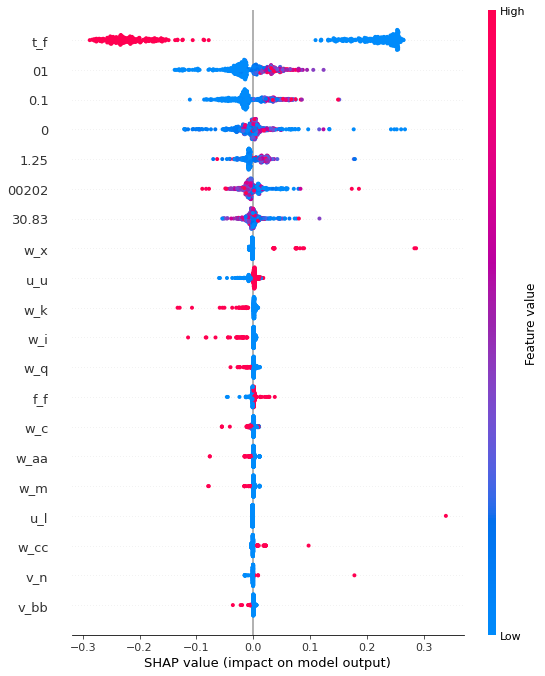

In [293]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

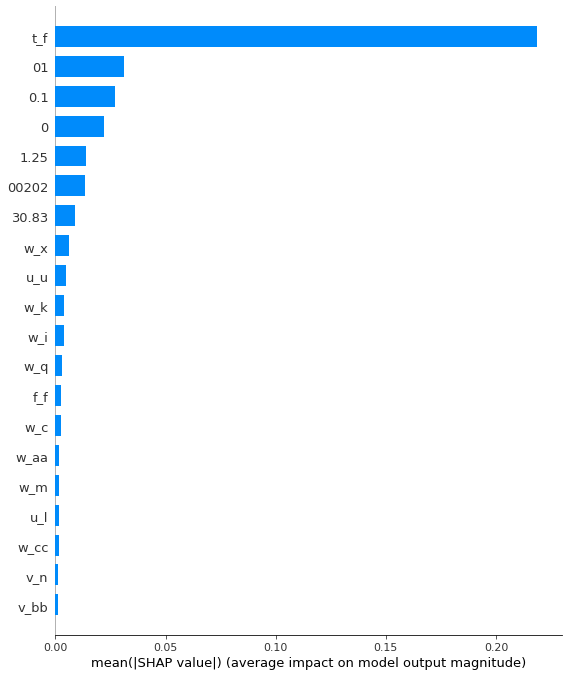

In [289]:
shap.summary_plot(shap_values, X_train, plot_type="bar")